12.1. 编译器和解释器
- 考虑另一种选择符号式编程（symbolic programming），即代码通常只在完全定义了过程之后才执行计算。这个策略被多个深度学习框架使用，包括Theano和TensorFlow（后者已经获得了命令式编程的扩展）。一般包括以下步骤：

- 1.定义计算流程；

- 2.将流程编译成可执行的程序；

- 3.给定输入，调用编译好的程序执行。

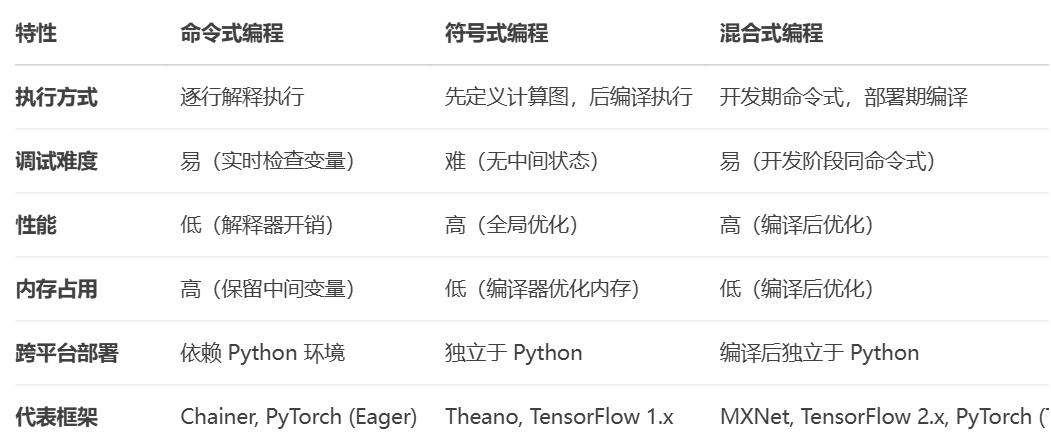

- 命令式编程使得新模型的设计变得容易，因为可以依据控制流编写代码，并拥有相对成熟的Python软件生态。

- 符号式编程要求我们先定义并且编译程序，然后再执行程序，其好处是提高了计算性能。

# 12.5 多gpu运行

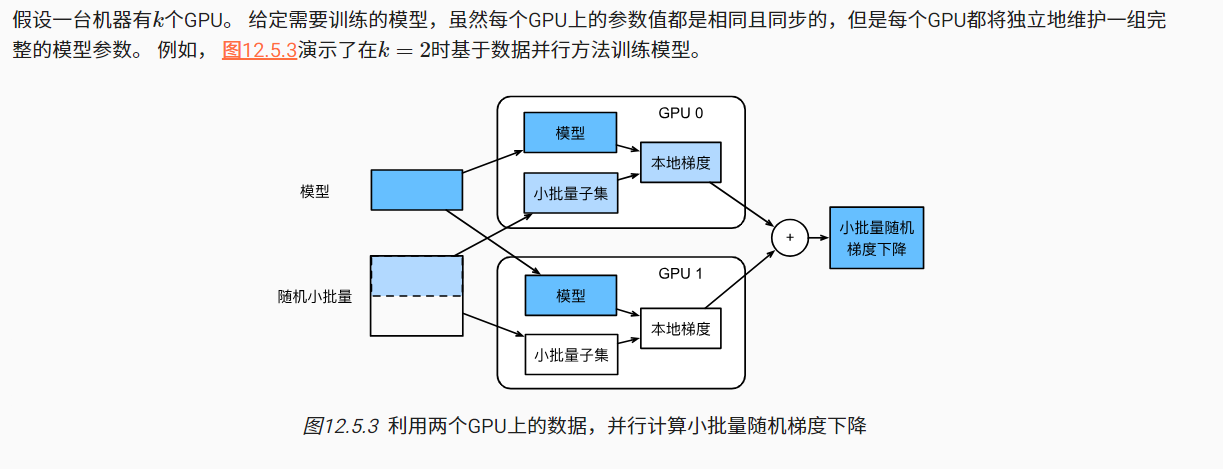

- 一般来说，
- 
个GPU并行训练过程如下：

- 在任何一次训练迭代中，给定的随机的小批量样本都将被分成k个部分，并均匀地分配到GPU上；

- 每个GPU根据分配给它的小批量子集，计算模型参数的损失和梯度；

- 将k个GPU中的局部梯度聚合，以获得当前小批量的随机梯度；

- 聚合梯度被重新分发到每个GPU中；

- 每个GPU使用这个小批量随机梯度，来更新它所维护的完整的模型参数集。

在实践中请注意，当在k个GPU上训练时，需要扩大小批量的大小为k的倍数，这样每个GPU都有相同的工作量，就像只在单个GPU上训练一样。 因此，在16-GPU服务器上可以显著地增加小批量数据量的大小，同时可能还需要相应地提高学习率。 还请注意,批量规范化也需要调整，例如，为每个GPU保留单独的批量规范化参数。

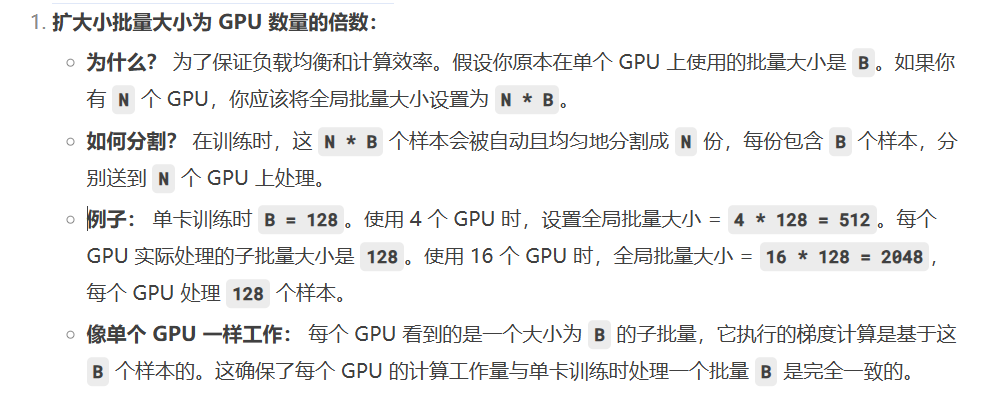

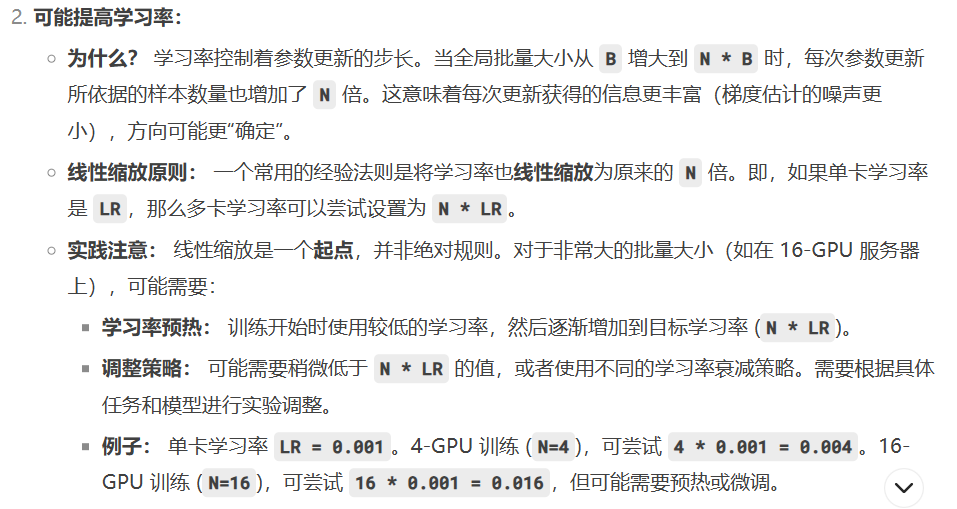